In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r'C:\Users\Ezequiel Vannucchi\Desktop\UTN\Cs de datos\DataSets\tp\dataset calidad de aire.csv')
df.head()

,Unnamed: 0,fecha,hora,co_la_boca,no2_la_boca,pm10_la_boca,fecha-hora,Flujo en Sentido A,Flujo en Sentido B,HORA,TEMP,HUM,PNM,DD,FF,weekday,dia de la semana
0,0,1/1/2019,1,0.48,10.0,23.0,2019-01-01 01,2397.0,1771.0,1.0,25.9,64.0,1010.6,70.0,19.0,Tuesday,2
1,1,1/1/2019,2,0.46,11.0,23.0,2019-01-01 02,3013.0,2384.0,2.0,25.4,67.0,1010.4,70.0,19.0,Tuesday,2
2,2,1/1/2019,3,0.46,12.0,23.0,2019-01-01 03,2098.0,1835.0,3.0,24.7,71.0,1010.5,50.0,20.0,Tuesday,2
3,3,1/1/2019,4,0.46,11.0,24.0,2019-01-01 04,1165.0,1254.0,4.0,24.1,75.0,1010.2,50.0,17.0,Tuesday,2
4,4,1/1/2019,5,0.45,9.0,24.0,2019-01-01 05,1176.0,1026.0,5.0,23.7,80.0,1010.8,70.0,17.0,Tuesday,2


Remocion de columnas innecesarias y primera aproximacion a los NaNs

In [5]:
df.drop(columns=['HORA','Unnamed: 0'], inplace=True)
print(df.shape)
print(df.isnull().sum())

(2868, 15)
fecha                   0
hora                    0
co_la_boca             63
no2_la_boca           404
pm10_la_boca          171
fecha-hora              0
Flujo en Sentido A    543
Flujo en Sentido B    543
TEMP                  101
HUM                   101
PNM                   101
DD                    101
FF                    101
weekday                 0
dia de la semana        0
dtype: int64


Quitamos los NaNs retantes

In [6]:
df_clean = df.dropna(subset=['Flujo en Sentido A'])
print(df_clean.isnull().sum())
print(df_clean.shape)

fecha                   0
hora                    0
co_la_boca             55
no2_la_boca           266
pm10_la_boca          128
fecha-hora              0
Flujo en Sentido A      0
Flujo en Sentido B      0
TEMP                   96
HUM                    96
PNM                    96
DD                     96
FF                     96
weekday                 0
dia de la semana        0
dtype: int64
(2325, 15)


In [7]:
df_clean = df_clean.dropna(subset=['FF'])
print(df_clean.isnull().sum())
print(df_clean.shape)

fecha                   0
hora                    0
co_la_boca             55
no2_la_boca           243
pm10_la_boca          125
fecha-hora              0
Flujo en Sentido A      0
Flujo en Sentido B      0
TEMP                    0
HUM                     0
PNM                     0
DD                      0
FF                      0
weekday                 0
dia de la semana        0
dtype: int64
(2229, 15)


C:\Users\Ezequiel Vannucchi\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Ezequiel Vannucchi\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


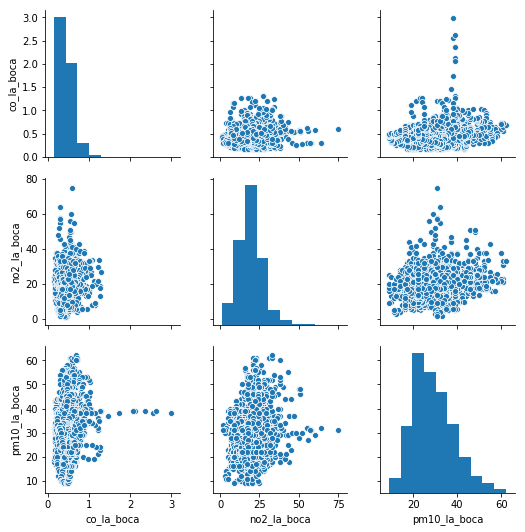

In [8]:
sns.pairplot(data=df_clean[['co_la_boca','no2_la_boca','pm10_la_boca','weekday']],)

In [9]:
#Remocion de outliers
co_q95 = df_clean['co_la_boca'].quantile(0.95)
no2_q95 = df_clean['no2_la_boca'].quantile(0.95)
pm10_q95 = df_clean['pm10_la_boca'].quantile(0.95)

df_clean2 = df_clean.loc[df_clean['co_la_boca']< co_q95]
df_clean2 = df_clean2.loc[df_clean2['co_la_boca']< no2_q95]
df_clean2 = df_clean2.loc[df_clean2['co_la_boca']< pm10_q95]

df_clean2.shape

(2064, 15)

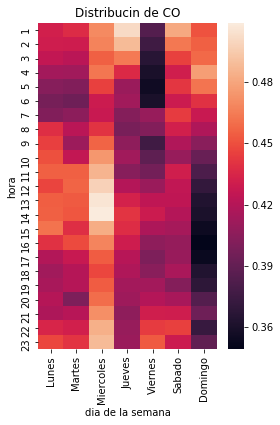

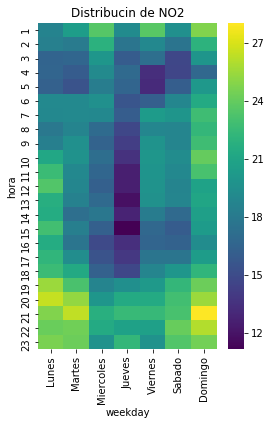

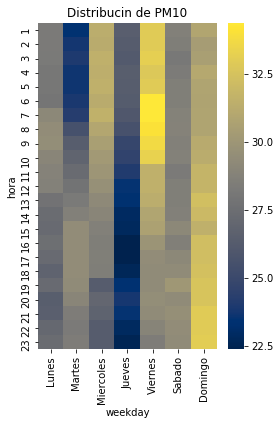

In [10]:
df_eda_co = pd.pivot_table(data=df_clean2,columns='dia de la semana',index='hora',values='co_la_boca',aggfunc='mean')
plt.figure(figsize=(4,6))
plt.title('Distribucin de CO')
ax =sns.heatmap(df_eda_co,xticklabels=['Lunes','Martes','Miercoles','Jueves','Viernes','Sabado','Domingo'])

df_eda_no2 = pd.pivot_table(data=df_clean2,columns='weekday',index='hora',values='no2_la_boca',aggfunc='mean')
plt.figure(figsize=(4,6))
plt.title('Distribucin de NO2')
sns.heatmap(df_eda_no2,cmap='viridis',xticklabels=['Lunes','Martes','Miercoles','Jueves','Viernes','Sabado','Domingo'])

df_eda_pm10 = pd.pivot_table(data=df_clean2,columns='weekday',index='hora',values='pm10_la_boca',aggfunc='mean')
plt.figure(figsize=(4,6))
plt.title('Distribucin de PM10')
sns.heatmap(df_eda_pm10,cmap='cividis',xticklabels=['Lunes','Martes','Miercoles','Jueves','Viernes','Sabado','Domingo'])

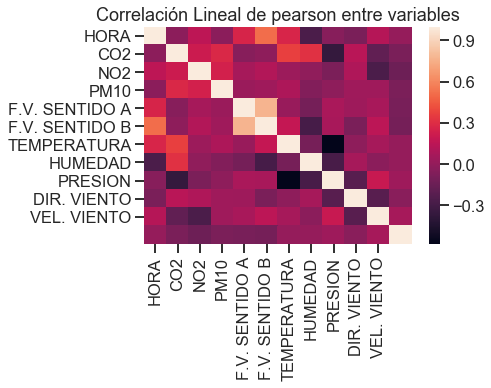

In [11]:
sns.set_style("white")
sns.set_context("talk")
sns.set_style("ticks")
sns.heatmap(df_clean2.corr(),yticklabels=['HORA','CO2','NO2','PM10','F.V. SENTIDO A','F.V. SENTIDO B','TEMPERATURA','HUMEDAD','PRESION','DIR. VIENTO','VEL. VIENTO'],xticklabels=['HORA','CO2','NO2','PM10','F.V. SENTIDO A','F.V. SENTIDO B','TEMPERATURA','HUMEDAD','PRESION','DIR. VIENTO','VEL. VIENTO'])
plt.title("Correlación Lineal de pearson entre variables")
plt.show()

In [12]:
df_dum_day = pd.get_dummies(df_clean['weekday'])
df_dum_hour = pd.get_dummies(df_clean['hora'])

df_drop = df_clean.drop(columns=['weekday','hora','dia de la semana'])
df_dummies = pd.concat([df_drop,df_dum_day,df_dum_hour], axis=1)

missing_co = df_dummies[df_dummies['co_la_boca'].isnull()]
missing_no2 = df_dummies[df_dummies['no2_la_boca'].isnull()]
missing_pm10 = df_dummies[df_dummies['pm10_la_boca'].isnull()]

In [13]:
print(df_dummies.shape)
df_clean_no_missings = df_dummies.dropna()

print(df_clean_no_missings.shape)

x = df_clean_no_missings.drop(columns=['co_la_boca','no2_la_boca','pm10_la_boca'])

y_co = df_clean_no_missings['co_la_boca']
print(y_co.shape)

y_no2 = df_clean_no_missings['no2_la_boca']
print(y_no2.shape)

y_pm10 = df_clean_no_missings['pm10_la_boca']
print(y_pm10.shape)

x.head()

(2229, 42)
(1897, 42)
(1897,)
(1897,)
(1897,)


,fecha,fecha-hora,Flujo en Sentido A,Flujo en Sentido B,TEMP,HUM,PNM,DD,FF,Friday,...,14,15,16,17,18,19,20,21,22,23
0,1/1/2019,2019-01-01 01,2397.0,1771.0,25.9,64.0,1010.6,70.0,19.0,0,...,0,0,0,0,0,0,0,0,0,0
1,1/1/2019,2019-01-01 02,3013.0,2384.0,25.4,67.0,1010.4,70.0,19.0,0,...,0,0,0,0,0,0,0,0,0,0
2,1/1/2019,2019-01-01 03,2098.0,1835.0,24.7,71.0,1010.5,50.0,20.0,0,...,0,0,0,0,0,0,0,0,0,0
3,1/1/2019,2019-01-01 04,1165.0,1254.0,24.1,75.0,1010.2,50.0,17.0,0,...,0,0,0,0,0,0,0,0,0,0
4,1/1/2019,2019-01-01 05,1176.0,1026.0,23.7,80.0,1010.8,70.0,17.0,0,...,0,0,0,0,0,0,0,0,0,0


PCA
----
Si bien puede ser considerado como una tecnica de clustering para las aplicaciones que nosotros le darémos decidimos incluirlo como parte del EDA. No obstante tambien lo figura en el script de machine learning

In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D
x_for_pca = x.drop(columns=['fecha-hora','fecha'])
x_for_pca.head()

,Flujo en Sentido A,Flujo en Sentido B,TEMP,HUM,PNM,DD,FF,Friday,Monday,Saturday,...,14,15,16,17,18,19,20,21,22,23
0,2397.0,1771.0,25.9,64.0,1010.6,70.0,19.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3013.0,2384.0,25.4,67.0,1010.4,70.0,19.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2098.0,1835.0,24.7,71.0,1010.5,50.0,20.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1165.0,1254.0,24.1,75.0,1010.2,50.0,17.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1176.0,1026.0,23.7,80.0,1010.8,70.0,17.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
scaler = MinMaxScaler().fit(x_for_pca)
x_for_pca_scal = scaler.transform(x_for_pca)
n_comps = 20
pca = PCA(n_components= n_comps)
xpca = pd.DataFrame(pca.fit_transform(x_for_pca_scal))
eigenvalues = pca.explained_variance_ratio_

C:\Users\Ezequiel Vannucchi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


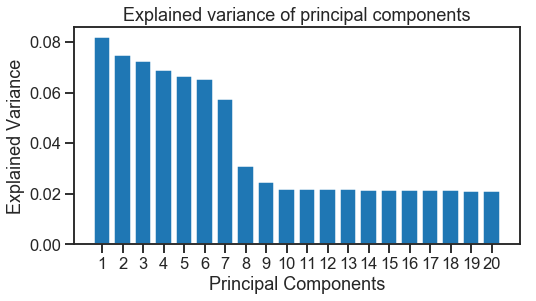

In [16]:
components = range(1,n_comps + 1)
plt.figure(figsize=(8,4))
plt.bar(components,eigenvalues)
plt.xticks(components)
plt.title('Explained variance of principal components')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.show()

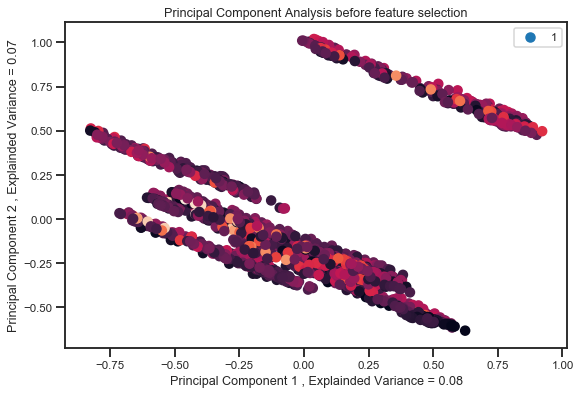

In [17]:
sns.set_context("talk", font_scale=0.7)
plt.figure(figsize=(9,6))
plt.scatter(xpca[0],xpca[1],c=y_co)
plt.xlabel('Principal Component 1 , Explainded Variance = ' + str(np.round(eigenvalues[0],2)))
plt.ylabel('Principal Component 2 , Explainded Variance = ' + str(np.round(eigenvalues[1],2)))
plt.title('Principal Component Analysis before feature selection')
plt.legend(loc='upper right')
plt.show()

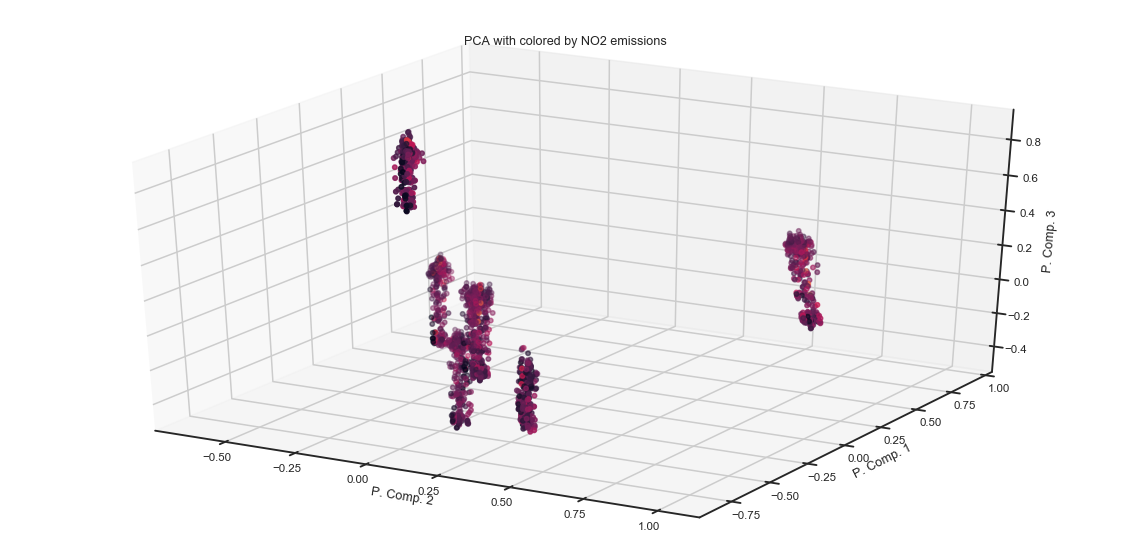

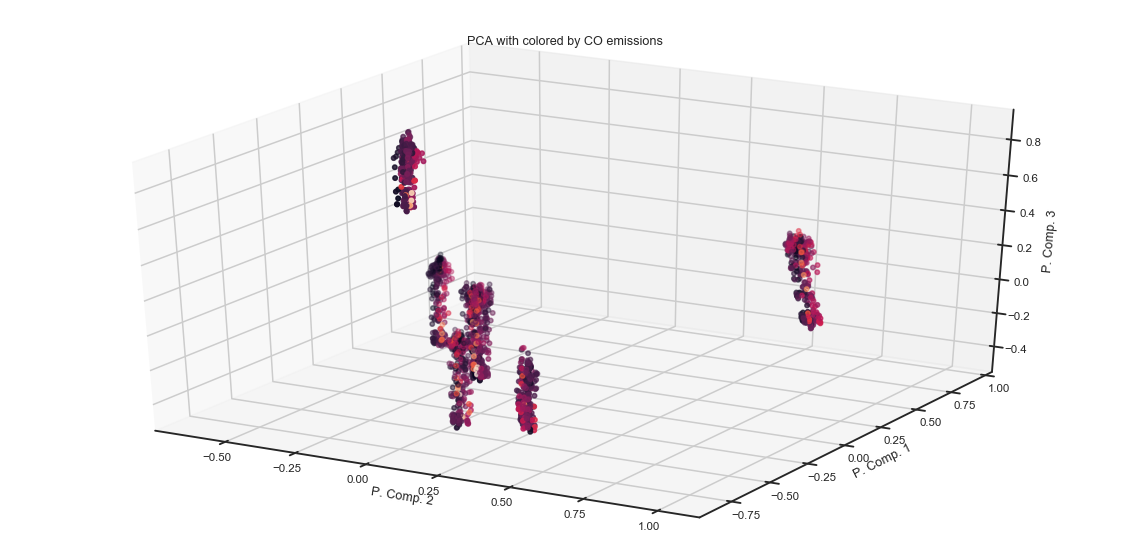

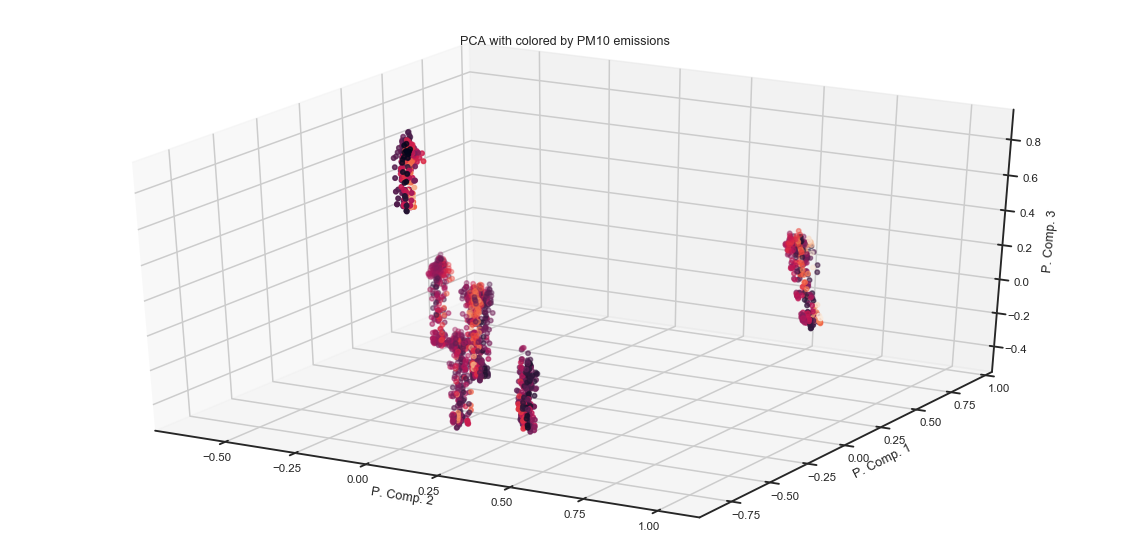

In [18]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xpca[1],xpca[0],xpca[2],c=y_no2)
#ax.scatter(xpca.iloc[(ytrain == 1).ravel(),0], xpca.iloc[(ytrain == 1).ravel(),1], xpca.iloc[(ytrain == 1).ravel(),2])
ax.set_xlabel('P. Comp. 2')
ax.set_ylabel('P. Comp. 1')
ax.set_zlabel('P. Comp. 3')
plt.title('PCA with colored by NO2 emissions')
plt.show()


fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xpca[1],xpca[0],xpca[2],c=y_co)
ax.set_xlabel('P. Comp. 2')
ax.set_ylabel('P. Comp. 1')
ax.set_zlabel('P. Comp. 3')
plt.title('PCA with colored by CO emissions')
plt.show()

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xpca[1],xpca[0],xpca[2],c=y_pm10)
ax.set_xlabel('P. Comp. 2')
ax.set_ylabel('P. Comp. 1')
ax.set_zlabel('P. Comp. 3')
plt.title('PCA with colored by PM10 emissions')
plt.show()